# Movie Recommender System - Thirteen Analytics Consulting

© Explore Data Science Academy

---

<img alt="Movie recommendations" src="https://github.com/Explore-AI/unsupervised-predict-streamlit-template/raw/master/resources/imgs/Image_header.png">

### Project Overview: Movie Recommendation

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

With this in mind **Thirteen Analytics** is tasked to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Introduction</a>

<a href=#two>2. Comet Experiment</a>

<a href=#three>3. Importing Packages</a>

<a href=#four>4. Loading Data</a>

<a href=#five>5. Exploratory Data Analysis (Pre-Data Processing)</a>

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Exploratory Data Analysis (Post-Data Processing)</a>

<a href=#eight>8. Modeling and Model Performance</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>
### Movie Recommender System
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

The key objectives of the project include:
* Develop a recommendation algorithm based on content or collaborative filtering. 
* The model predict how an individual will rate a movie based on historical movie selection patterns.
* The model should demonstrate the potential to be applied to create an economically robust system that enables users to have a personalized recommendaation system for a daily use. 

<a id="two"></a>
## 2. Comet Experiment
<a href=#cont>Back to Table of Contents</a>

Below is a cell to capture our experiement and post our progress on the version control platform, Comet.

In [1]:
from comet_ml import Experiment

# # Create an experiment with your api key
# experiment = Experiment(
#  api_key="0WPX5QrkfJHeQjc6pbEbzT9fz",
#   project_name="general",
#   workspace="oladotun-jonibola",)


# Create an experiment with your api key
experiment = Experiment(
    api_key="pRMxFxeNwUPYOyNGu3BPn91GY",
    project_name="movie-recommender",
    workspace="jakam",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jakam/movie-recommender/9308c0a35e254a64b76f906200729cf2



<a id="three"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
from datetime import datetime


#libraries to preprocess data
import nltk
import itertools
from nltk.corpus import stopwords
import string
from tqdm.auto import tqdm
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

 
from sklearn.model_selection import train_test_split
# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from sklearn.neighbors import  NearestNeighbors
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Packages for saving models
import pickle

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Package to suppress warnings
import warnings
warnings.filterwarnings('ignore')

<a id="four"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The project utilises a special version of MovieLens dataset, which has been enriched with additional data and resampled for fair evaluation purposes. 

**Data Source**<br>
The data is maintained by GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. The additional data content was legally scraped from [IMDB](https://www.imdb.com/).

**Provided Files**
* genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
* genome_tags.csv - user assigned tags for genome-related scores
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.
<br>



In [3]:
df_train=pd.read_csv('data/train.csv')
df_imdb=pd.read_csv('data/imdb_data.csv')
df_links=pd.read_csv('data/links.csv')
df_movies=pd.read_csv('data/movies.csv')
df_tags=pd.read_csv('data/tags.csv')
df_test=pd.read_csv('data/test.csv')

<a id="five"></a>
## 5. Exploratory Data Analysis (Pre-Data Processing)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Exploratory Data Analysis (EDA) is an opportunity to analyze and investigate data sets and summarise the main characteristics. In most cases, it is characterized by the use of data visualization methods because of the effectiveness of plots in showing patterns and shapes. EDA is paramount because it has a direct impact on the quality of the final model. The EDA process is an opportunity to understand the data, which turn guides the decisions made during feature engineering, which is basically the manipulation of data to get it ready for modelling. EDA ensures that one selects appropriate statistical techniques for the provided data. <br>
In some instances, Data Scientists use EDA  to ensure the results produced are valid and applicable to the targeted business outcomes. In this project, EDA aids in understanding the content and patterns in all the datasets provided, which in turn guides the decision about how to combine the datasets in preparation for model training.

In the following section, we preview the train file that has user and movie IDs and the associated user rating. 

In [4]:
# Preview Train Data

df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


The train dataframe contains userid, movieid, rating and the timestamp associated with each rating. According to MovieLens, the timestamps represent seconds since midnight Coordinated Universal Time(UTC) of January 1970.

In [5]:
# Check Train Data Information

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


**Observations:** 
1. There are 10000038 rows and 4 columns.
2. The data types consist of 3 integer and 1 float data type
3. The size of the data is 305.2 MB
4. The date is in timestamp, this would be converted to data time during feature engineering.

The Movies Data file provides information about movie title and genres. In the following cell, the dataset is previewed to facilitate a deeper understanding of the provided datasets.

In [6]:
# Previews Movies Data

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
# Check movies file information

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Observations:** 

1. There are 62423 rows and 3 columns.
2. The data types consist of 1 interger and 2 object data type
3. The size of the data is 1.4+ MB
4. There are no null values.

In [8]:
# Preview Tags Data

df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
# Check Tags Information

df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [10]:
# Preview Links file

df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [11]:
# Check links Information

df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


**Observations:**

1. There are 662423 rows and 3 columns. 
2. All features are numerical. 

In [12]:
# Preview IMDB Data

df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [13]:
# Check IMDB Data Information

df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


**Observations:**

1. There are 27,278 rows and 6 columns in the dataset.
2. Title cast, direct, budget and plot_keywords are not numerical.
3. The numerical columns are movieId and runtime. 

In [14]:
# Check for missing values in all the files

df_list = [df_train, df_movies, df_tags, df_links, df_imdb, df_test]
df_list_names = ['df_train',  'df_movies', 'df_tags', 'df_links', 'df_imdb', 'df_test']

for i, n in zip(df_list, df_list_names):
    x = i.isnull().sum()
    print(f'{n} has {x}')

df_train has userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
df_movies has movieId    0
title      0
genres     0
dtype: int64
df_tags has userId        0
movieId       0
tag          16
timestamp     0
dtype: int64
df_links has movieId      0
imdbId       0
tmdbId     107
dtype: int64
df_imdb has movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
df_test has userId     0
movieId    0
dtype: int64


**Observations:** 
1. The df_tag table has the tag column with **16** null values 
2. The df_links table has tmdbId column with **107** missing values and 
3. The df_imdb table has title_cast, director, runtime, budget and plot_keywords columns with **10,068**, **9,874**, **12,089**, **19,372**, **11,078** null values respectively.

In [15]:
# Get Value Counts for Rating Column in Train Dataset

xv = df_train['rating'].value_counts()

Text(0.5, 1.0, 'Rating Distribution')

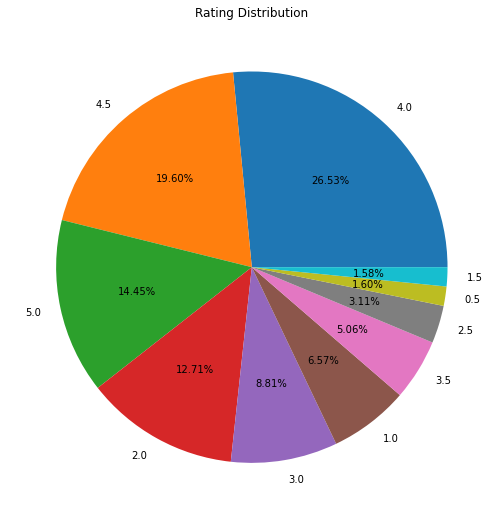

In [16]:
# Plot Pie Chart for the Distribution of Ratings

# Set unique values in rating column as labels
label = df_train['rating'].unique()

# Define figure size and labels.
fig = plt.figure(figsize=(15,9));
plt.pie (xv,data=df_train, autopct='%1.2f%%',labels=label)
plt.show
plt.title ('Rating Distribution')

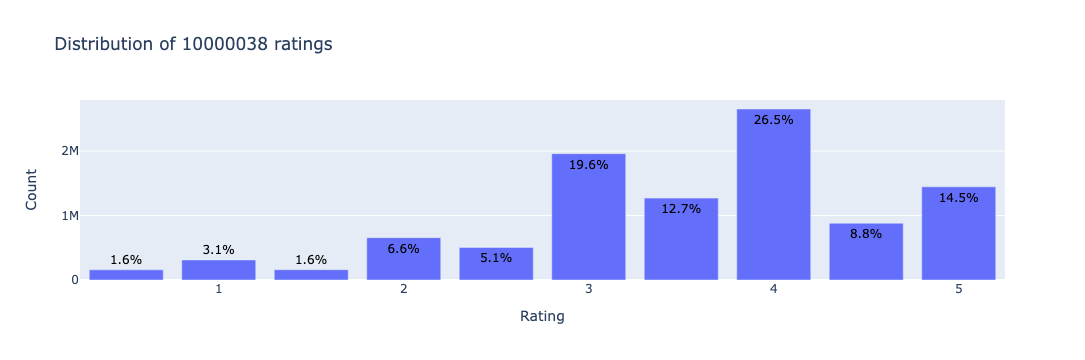

In [18]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

data = df_train['rating'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index, 
              text = ['{:.1f}%'.format(val) for val in (data.values/df_train.shape[0] * 100)],
              textposition = 'auto',
              textfont = dict(color = '#000000'),
              y = data.values,
              )
# Layout Creation
layout = dict(title = 'Distribution of {} ratings'.format(df_train.shape[0]),
             xaxis = dict(title = 'Rating'),
             yaxis = dict(title = 'Count'))

# Create Plot
fig = go.Figure(data = [trace], layout=layout)
fig.show()

The piechart shows the overall distribution of movie title ratings by different users. From the piechart, some of the notable facts include:
*  A rating of 4.0 is the most popular rating followed by 4.5. Based on the rating distribution many users prefer to give rating of 4.0-4.5.
* A perfect rating of 5.0 accounts for 14.45% of the total ratings in the dataset. 
* Many users do not like providing low ratings due to reasons not clear from the piechart. 

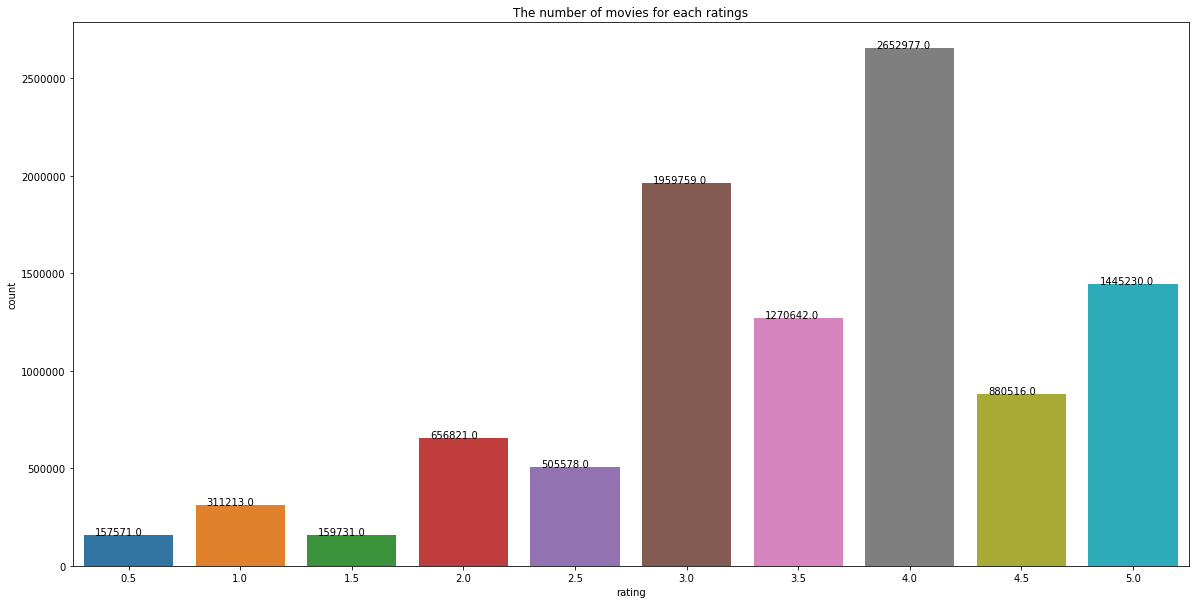

In [17]:
# A Bar Graph Representation of the Ratings Distribution

fig, ax = plt.subplots(figsize=(20, 10)) # Initialize the plot with set figure size

sns.countplot(ax=ax, x='rating', data=df_train) # Create a countplot to visualise the number of movies per category
ax.set_title("The number of movies for each ratings")
plt.ticklabel_format(style='plain', axis='y', useOffset=False) # Set the tick labels to appear in non-scientific form

# Make the counts appear on the different
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
    
# Show the countplot
plt.show()

Show the percentage of movies with each rating. 

**Observations:** The two most common ratings are that of 4.0 and 3.0

The EDA process has been instrumental to the process of understanding the provided data. Some of the overall insights from the EDA section include:
1. The datasets provided should be merged to create a tabular data with enough information for modelling a movie recommender system. 
2. Each dataset has columns with different data types, which must be taken into consideration during the modelling stage. 
3. There are some datasets with null values that must be handled to avoid errors and improve the overall performance of the model exposed to the prepared data. 


<a id="six"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

Feature Engineering entails the application of domain knowledge to extract features(properties, characteristics and attributes) from a dataset. In this project, the data engineering section includes mergin datasets to facilitate the modelling process. The steps in data engineering include checking features and relying on insights from EDA to decide on the features that needed to created, removed or retained. The impact of the created features is assessed to check their impact and improved if needed arises. Data Engineering is a constinous process that goes as long as there is a chance to improve model performance. 

The first step is to merge the train and movies dataset to bring the movie tite, genres, users, rating, timestamp together.

In [19]:
# Merging train, movies, imdb datasets to create content based data.

# Train and movies merge
new_data = pd.merge(df_train, df_movies, on='movieId', how='left')

# New data and IMDB data Merge
new_data_n = pd.merge(new_data, df_imdb, on='movieId', how='left')

# Assign the value of content based data variable
content_based_data = new_data_n

In the following cells the text data in found in the content based data is cleaned in preparation for vectorization. There is a need to deal with movie titles that have years, parenthesis and spaces in some cast information, plot keywords and movie genres.

In [20]:
# We specify the parantheses so we don't conflict with movies that have years in their titles 
content_based_data['movie_year'] = content_based_data.title.str.extract('(\(\d\d\d\d\))',expand=False)

# Removing the parentheses
content_based_data['movie_year'] = content_based_data.movie_year.str.extract('(\d\d\d\d)',expand=False)

# Removing the years from the 'title' column
content_based_data['title'] = content_based_data.title.str.replace('(\(\d\d\d\d\))', '')

# Applying the strip function to get rid of any ending whitespace characters that may have appeared
content_based_data['title'] = content_based_data['title'].apply(lambda x: x.strip())

# Remove separator from cast information column
content_based_data['title_cast']=content_based_data['title_cast'].str.replace('|',' ')


# Removing separator from the plot keywords column
content_based_data['plot_keywords']= content_based_data['plot_keywords'].str.replace('|',' ')

# Removing separator from the movie genre column
content_based_data['genres'] = content_based_data['genres'].str.replace('|',' ')

In [21]:
# Sample Data for Analysis (100000 rows)
sample_content_based_data = content_based_data[0:10000]

# Inspect sampled data
sample_content_based_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         10000 non-null  int64  
 1   movieId        10000 non-null  int64  
 2   rating         10000 non-null  float64
 3   timestamp      10000 non-null  int64  
 4   title          10000 non-null  object 
 5   genres         10000 non-null  object 
 6   title_cast     7043 non-null   object 
 7   director       7044 non-null   object 
 8   runtime        6998 non-null   float64
 9   budget         6483 non-null   object 
 10  plot_keywords  7034 non-null   object 
 11  movie_year     9997 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1015.6+ KB


In [22]:
# Create new column to hold cast information, director details, movie genre, plot keywords and movie titles. 

sample_content_based_data['combined'] = (pd.Series(sample_content_based_data[['title_cast', 'director','plot_keywords','genres','title']]
                      .fillna('')
                      .values.tolist()).str.join(' '))

In [23]:
# Check for missing values

sample_content_based_data.isnull().sum()

userId              0
movieId             0
rating              0
timestamp           0
title               0
genres              0
title_cast       2957
director         2956
runtime          3002
budget           3517
plot_keywords    2966
movie_year          3
combined            0
dtype: int64

In [24]:
# Content Based Column with all the meta data 
sample_content_based_data['content_based'] = sample_content_based_data['title_cast']+' '\
                                            +sample_content_based_data['director']+' '\
                                            +sample_content_based_data['plot_keywords']+' '\
                                            +sample_content_based_data['genres']+ ' '\
                                            +sample_content_based_data['title']
#Preview Data
sample_content_based_data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,movie_year,combined,content_based
0,5163,57669,4.0,1518349992,In Bruges,Comedy Crime Drama Thriller,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf bruges irish hitman,2008,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Elizabeth Berrington Rudy Blomme Olivier Bonjo...
1,106343,5,4.5,1206238739,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,1995,Steve Martin Diane Keaton Martin Short Kimberl...,Steve Martin Diane Keaton Martin Short Kimberl...
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Action Comedy Sci-Fi,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie michael jackson character shorthaired...,2002,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous,Adventure Comedy Crime,Sandra Bullock Regina King Enrique Murciano Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist cleave gag good woman fbi,2005,Sandra Bullock Regina King Enrique Murciano Wi...,Sandra Bullock Regina King Enrique Murciano Wi...
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger elm street famous director as h...,1994,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Jeff Davis Heather Langenkamp Miko Hughes Matt...


<a id="seven"></a>
## 7. Exploratory Data Analysis (Post-Data Processing)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [25]:
# Find mean rating based on movie title

content_based_data.groupby('title')['rating'].mean().sort_values(ascending=False).head().reset_index()

,title,rating
0,Tischlein deck dich,5.0
1,It Seemed Like a Good Idea at the Time,5.0
2,Immigration Tango,5.0
3,Slingshot Hip Hop,5.0
4,Slender,5.0


We checked the first five movies that had the best rating

In [26]:
# Average ratig for movie titles
ratings = pd.DataFrame(content_based_data.groupby('title')['rating'].mean())
ratings

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000
"""Great Performances"" Cats",2.753731
#1 Cheerleader Camp,1.900000
#Female Pleasure,4.000000
#FollowMe,2.400000
...,...
به نام پدر,3.250000
…And the Fifth Horseman Is Fear,3.000000
チェブラーシカ,2.000000


Average ratings of all users we obtained and we noticed that they were within the range of 2.3-3.3

In [27]:
# Number of Ratings Per Movie Title

ratings['num of ratings'] = pd.DataFrame(content_based_data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together",3.000000,1
"""Great Performances"" Cats",2.753731,67
#1 Cheerleader Camp,1.900000,5
#Female Pleasure,4.000000,1
#FollowMe,2.400000,5


The movie Days of summer had the highest number of ratings

In [28]:
print('A total of ',df_train["userId"].nunique(), 'users have watched a total of',\
                    df_train.movieId.nunique(),'movies in the database/dataframe')

A total of  162541 users have watched a total of 48213 movies in the database/dataframe


In [29]:
# Create a Dataframe consisting of the users average rating the give per user and number of times they have rated movies
user_rating_mean = pd.DataFrame(df_train.groupby('userId')['rating'].mean().reset_index())
user_rating_count = pd.DataFrame(df_train.groupby('userId')['rating'].count().reset_index())

# Merge the above to dataframe 
comb_user_rating = user_rating_mean.merge(user_rating_count,on='userId',how = 'left')

# Rename the columns respectively
comb_user_rating.rename(columns={'rating_x':'Avg_rating','rating_y':'Number_of_movies'},inplace = True)

# Sort the data in descending of the number of movies the user has rated
comb_user_rating = comb_user_rating.sort_values('Avg_rating', ascending = False)

# Show 5 observations 
comb_user_rating.head()

,userId,Avg_rating,Number_of_movies
83902,83903,5.0,19
9631,9632,5.0,5
161714,161715,5.0,7
45507,45508,5.0,9
42156,42157,5.0,8


The userId 83903 had the highest number of movies watched

In [30]:
user_pref=content_based_data.groupby('userId')['userId','title','movie_year']
user_pref.head()

,userId,title,movie_year
0,5163,In Bruges,2008
1,106343,Father of the Bride Part II,1995
2,146790,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),2002
3,106362,Miss Congeniality 2: Armed and Fabulous,2005
4,9041,Wes Craven's New Nightmare (Nightmare on Elm S...,1994
...,...,...,...
9996388,91549,"People vs. Larry Flynt, The",1996
9996465,8513,Frost/Nixon,2008
9996772,55494,Thelma & Louise,1991
9996780,57926,M*A*S*H (a.k.a. MASH),1970


The movie year column shows the year every movies was produced.

<a id="eight"></a>
## 8. Modelling and Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In other to find solutions to this business problem we decided to use the recommender system. It is divided into:
### 1. Collaborative Filtering

The collaborative filtering method is based on gathering and analyzing data on user’s behavior. This includes the user’s online activities and predicting what they will like based on the similarity with other users.

<img alt="Collaborative Filtering" class="cf kg kh" src="https://miro.medium.com/max/1400/1*SPE85ePd_aiJDO9RVbfbig.png" width="700" height="676">

To start off with the collaborative recommendation, we would use the Singular Value Decomposition found in `suprise` library in `sklearn`. 
`Surprise` is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

<img alt="" class="cf lc ld" src="https://miro.medium.com/max/875/1*dnvjYsiEhj-NzFf6ZeCETg.jpeg" width="700" height="443" role="presentation">

**Singular Value Decomposition**
SVD is part of the method of principal components analysis, which is used to reduce the number of factors to a smaller number of factor groups (principal components) by specific operations in linear algebra, analogous to finding the least common denominator among a series of divisors in a group of numbers.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBguoc1HE5vKPG3HZHejvDSXQgE9cxKwWXTA&amp;usqp=CAU" class="rg_i Q4LuWd" jsname="Q4LuWd" width="500" height="200" alt="What is Singular Value Decomposition (SVD)? A 2-minute visual guide. [OC] :  r/computerscience" data-iml="58052.5">

In [41]:
reader = Reader()
data = Dataset.load_from_df(df_train[['userId', 'movieId', 'rating']], reader)
svd = SVD()

Now lets use the built-in datasets to obtain our trainset and fit our model to it.

In [ ]:
data = df_train.sample(n=10000)
data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)

benchmark = []
# Iterate over all algorithms

algorithms = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), 
              KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

print ("Attempting: ", str(algorithms), '\n\n\n')

for algorithm in algorithms:
    print("Starting: " ,str(algorithm))
    
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
  
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    print("Done: " ,str(algorithm), "\n\n")

print ('\n\tDONE\n')

In [42]:
trainset = data.build_full_trainset()
print("> OK")

print("Training...")
svd.fit(trainset)
print("Done.")

> OK
Training...
Done.


### 2. Content-Based Filtering

Content-based filtering methods are based on the description of a product and a profile of the user’s preferred choices. In this recommendation system, products are described using keywords, and a user profile is built to express the kind of item this user likes.

<img alt="Content-Based Filtering" class="cf kg kh" src="https://miro.medium.com/max/1400/1*3YEZG1dEqvNz70h0uhP5Fg.png" width="700" height="676">

To derive our content based recommender system, we gathered the various properties of our items so that we can convert them into meaningful features. This was done in the feature engineering section. We combined five (5) different features such as `title`, `title cast`, `director`, `plot keywords` and `genre`. We are going to utilize the combined feature of the `new_content_based_data`. Now lets examine the first five rows of the data.

In [137]:
new_content_based_data.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,movie_year,content_based,combined
0,5163,57669,4.0,1518349992,In Bruges,Comedy Crime Drama Thriller,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf bruges irish hitman,2008,Elizabeth Berrington Rudy Blomme Olivier Bonjo...,Elizabeth Berrington Rudy Blomme Olivier Bonjo...
1,106343,5,4.5,1206238739,Father of the Bride Part II,Comedy,Steve Martin Diane Keaton Martin Short Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood doberman dog mansion,1995,Steve Martin Diane Keaton Martin Short Kimberl...,Steve Martin Diane Keaton Martin Short Kimberl...
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Action Comedy Sci-Fi,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Lowell Cunningham,88.0,"$140,000,000",lingerie michael jackson character shorthaired...,2002,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...,Tommy Lee Jones Will Smith Rip Torn Lara Flynn...
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous,Adventure Comedy Crime,Sandra Bullock Regina King Enrique Murciano Wi...,Marc Lawrence,115.0,"$45,000,000",female protagonist cleave gag good woman fbi,2005,Sandra Bullock Regina King Enrique Murciano Wi...,Sandra Bullock Regina King Enrique Murciano Wi...
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama Horror Mystery Thriller,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Wes Craven,112.0,"$8,000,000",freddy krueger elm street famous director as h...,1994,Jeff Davis Heather Langenkamp Miko Hughes Matt...,Jeff Davis Heather Langenkamp Miko Hughes Matt...


In [138]:
new_content_based_data=new_content_based_data.reset_index()
titles = new_content_based_data['title']
indices = pd.Series(new_content_based_data.index, index=new_content_based_data['title'])

We now need a mechanism to convert these textual features into a format which enables us to compute their relative similarities to one another.
This will allow us to translate our string-based collection of tags and authors into numerical vectors

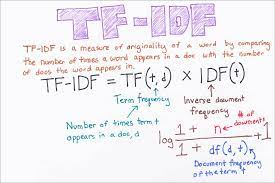

In [139]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a book,
# with TF-IDF features as columns 
tf_authTags_matrix = tf.fit_transform(new_content_based_data['combined']) 

We now can compute the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function provided to us by `sklearn`.

<img data-ils="4" jsaction="rcuQ6b:trigger.M8vzZb;" class="rg_i Q4LuWd" jsname="Q4LuWd" width="500" height="180" alt="What is Cosine Similarity? How to Compare Text and Images in Python | by  Ben Chamblee | Towards Data Science" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5Phznfs7A495kKUiDWrr7Wv3EYt5xKjqoyQ&amp;usqp=CAU">

In [140]:
cosine_sim_authTags = cosine_similarity(tf_authTags_matrix, 
                                        tf_authTags_matrix)
print (cosine_sim_authTags.shape)

(10000, 10000)


The resulting structure is a $10000 \times 10000$ dense similarity matrix $S^I$, where the value of the entry in the $i^{th}$ row and $j^{th}$ column, $S^I_{i,j}$, corresponds to the similarity of books $i$ and $j$ within our dataset.

Using this notation, if $i$ and $j$ are the same number (i.e. all the diagonal entries in $S^I$), then the similarity value is equal to 1 (an item is completely similar to itself). 

In [141]:
cosine_sim_authTags

array([[1.00000000e+00, 8.51484101e-03, 9.15500175e-04, ...,
        6.46663168e-03, 0.00000000e+00, 2.89922943e-03],
       [8.51484101e-03, 1.00000000e+00, 1.47244446e-02, ...,
        2.72006095e-03, 4.72887411e-03, 2.06447131e-03],
       [9.15500175e-04, 1.47244446e-02, 1.00000000e+00, ...,
        1.29907683e-02, 3.12510055e-03, 7.20444829e-03],
       ...,
       [6.46663168e-03, 2.72006095e-03, 1.29907683e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.72887411e-03, 3.12510055e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.89922943e-03, 2.06447131e-03, 7.20444829e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

#### Top Recommendations

With our content similarity matrix computed, we're now ready to make some recommendations! Let's begin by generating a top list of books similar to one which we prompt the system with.    

Following along from our earlier algorithmic explanation, we do this by: 

  1. Select an initial item (movies) to generate recommendations from. 
  2. Extract all the similarity values between the initial item and each other item in the similarity matrix.
  3. Sort the resulting values in descending order. 
  4. Select the top similarity values, and return the corresponding item details to the user.  
  

In [164]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_authTags[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [159]:
get_recommendations("Miss Congeniality 2: Armed and Fabulous") 

6512    Miss Congeniality
6760    Miss Congeniality
9074    Miss Congeniality
9294    Miss Congeniality
Name: title, dtype: object

Please note that due to large computing storage and the extensive computing time, we restrited our data to $10,000$ rows 